<h1><center><b>Chronic Kidney Disease: An Analytical Prediction Using Machine Learning</b></center></h1>

### Importing Packages & Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score

### Load Dataset

In [2]:
df = pd.read_csv("Main_CKD.csv",header=0, na_values="?")
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.000000,5.200000,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.000000,3.800000,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,33.2,7493.333333,3.946667,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


### Exploratory Analysis of Data

#### Information about Dataset

- Age		-	age	
- Bp		-	blood pressure
- Sg		-	specific gravity
- Al		-   	albumin
- Su		-	sugar
- Rbc		-	red blood cells
- Pc		-	pus cell
- Pcc		-	pus cell clumps
- Ba		-	bacteria
- Bgr		-	blood glucose random
- Bu		-	blood urea
- Sc		-	serum creatinine
- Sod		-	sodium
- Pot		-	potassium
- Hemo		-	hemoglobin
- Pcv		-	packed cell volume
- Wc		-	white blood cell count
- Rc		-	red blood cell count
- Htn		-	hypertension
- Dm		-	diabetes mellitus
- Cad		-	coronary artery disease
- Appet		-	appetite
- Pe		-	pedal edema
- Ane		-	anemia
- Class		-	class (ckd or not)

Number of Instances:  400 (250 CKD, 150 notckd)
 
Number of Attributes: 24 + class = 25 ( 14  numeric ,11  nominal) 

Attribute Information :

 	1.Age(numerical)
	  	age in years
 	2.Blood Pressure(numerical)
	  	bp in mm/Hg
 	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
 	4.Albumin(nominal)
		al - (0,1,2,3,4,5)
 	5.Sugar(nominal)
		su - (0,1,2,3,4,5)
 	6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)
 	7.Pus Cell (nominal)
		pc - (normal,abnormal)
 	8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)
 	9.Bacteria(nominal)
		ba  - (present,notpresent)
 	10.Blood Glucose Random(numerical)		
		bgr in mgs/dl
 	11.Blood Urea(numerical)	
		bu in mgs/dl
 	12.Serum Creatinine(numerical)	
		sc in mgs/dl
 	13.Sodium(numerical)
		sod in mEq/L
 	14.Potassium(numerical)	
		pot in mEq/L
 	15.Hemoglobin(numerical)
		hemo in gms
 	16.Packed  Cell Volume(numerical)
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
 	18.Red Blood Cell Count(numerical)	
		rc in millions/cmm
 	19.Hypertension(nominal)	
		htn - (yes,no)
 	20.Diabetes Mellitus(nominal)	
		dm - (yes,no)
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22.Appetite(nominal)	
		appet - (good,poor)
 	23.Pedal Edema(nominal)
		pe - (yes,no)	
 	24.Anemia(nominal)
		ane - (yes,no)
 	25.Class (nominal)		
		class - (ckd,notckd)

Missing Attribute Values: Yes(Denoted by "?")

Class Distribution: ( 2 classes)

    		Class 	  Number of instances
    		ckd          	  250
    		notckd       	  150   

In [3]:
df.shape

(400, 25)

In [4]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,40.878192,10956.605559,4.578652
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,12.688088,6052.813991,1.208439
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,7.400238,-842.040816,0.674898
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,7200.000000,3.800000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,41.000000,9400.000000,4.704167
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,48.000000,11800.000000,5.500000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,74.940476,31529.761900,6.570238


### Data Cleaning

In [6]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  0
cad                 0
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
Age = df['age'].isna().sum()*(100/len(df))
Bp = df['bp'].isna().sum()*(100/len(df))
Sg = df['sg'].isna().sum()*(100/len(df))
Al = df['al'].isna().sum()*(100/len(df))
Su = df['su'].isna().sum()*(100/len(df))
Rbc = df['rbc'].isna().sum()*(100/len(df))
Pc = df['pc'].isna().sum()*(100/len(df))
Pcc = df['pcc'].isna().sum()*(100/len(df))
Ba = df['ba'].isna().sum()*(100/len(df))
Bgr = df['bgr'].isna().sum()*(100/len(df))
Bu = df['bu'].isna().sum()*(100/len(df))
Sc = df['sc'].isna().sum()*(100/len(df))
Sod = df['sod'].isna().sum()*(100/len(df))
Pot = df['pot'].isna().sum()*(100/len(df))
Hemo = df['hemo'].isna().sum()*(100/len(df))
Pcv = df['pcv'].isna().sum()*(100/len(df))
Wbcc = df['wc'].isna().sum()*(100/len(df))
Rbcc = df['rc'].isna().sum()*(100/len(df))
Htn = df['htn'].isna().sum()*(100/len(df))
Dm = df['dm'].isna().sum()*(100/len(df))
Cad = df['cad'].isna().sum()*(100/len(df))
Appet = df['appet'].isna().sum()*(100/len(df))
pe = df['pe'].isna().sum()*(100/len(df))
Ane = df['ane'].isna().sum()*(100/len(df))
Class = df['classification'].isna().sum()*(100/len(df))

In [8]:
Null_Percentage = pd.DataFrame({
    'Attribute': ['Age' , 'Blood Pressure' , 'Specific Gravity' , 'Albumin' , 'Sugar' , 'Red Blood Cells' , 'Pus Cell' , 'Pus Cell Clumps' , 'Bacteria' , 'Blood Glucose Random' , 'Blood Urea' , 'Serum Creatinine' , 'Sodium' , 'Potassium' , 'Hemoglobin' , 'Packed Cell Volume' , 'White Blood Cell Count' , 'Red Blood Cell Count' , 'Hypertension' , 'Diabetes Mellitus' , 'Coronary Artery Disease' , 'Appetite' , 'Pedal Edema' , 'Anemia' , 'Class'],
    'Missing Values (%)' : [(round(Age, 2)) ,(round(Bp, 2)) ,(round(Sg, 2)),(round(Al, 2)) ,(round(Su, 2)) ,(round(Rbc, 2)) ,(round(Pc, 2)) ,(round(Pcc, 2)) ,(round(Ba, 2)) ,(round(Bgr, 2)) ,(round(Bu, 2)) ,(round(Sc, 2)) ,(round(Sod, 2)) ,(round(Pot, 2)) ,(round(Hemo, 2)) ,(round(Pcv, 2)) ,(round(Wbcc, 2)) ,(round(Rbcc, 2)) ,(round(Htn, 2)) ,(round(Dm, 2)) ,(round(Cad, 2)) ,(round(Appet, 2)) ,(round(pe, 2)) ,(round(Ane, 2)) ,(round(Class, 2))]
})
Null_Percentage

,Attribute,Missing Values (%)
0,Age,2.25
1,Blood Pressure,3.00
2,Specific Gravity,11.75
3,Albumin,11.50
4,Sugar,12.25
5,Red Blood Cells,38.00
6,Pus Cell,16.25
7,Pus Cell Clumps,1.00
8,Bacteria,1.00
9,Blood Glucose Random,11.00


In [9]:
cleanup = {"rbc": {"normal": 1, "abnormal": 0},
          "pc": {"normal": 1, "abnormal": 0},
          "pcc": {"present": 1, "notpresent": 0},
          "ba": {"present": 1, "notpresent": 0},
          "htn": {"yes": 1, "no": 0},
          "dm": {"yes": 1,"\tyes": 0, "no": 0, "\tno": 0},
          "cad": {"yes": 1,"\tyes": 0, "no": 0, "\tno": 0},
          "appet": {"good": 1, "poor": 0},
          "pe": {"yes": 1,"\tyes": 0, "no": 0, "\tno": 0},
          "ane": {"yes": 1,"\tyes": 0, "no": 0, "\tno": 0}
          }
df.replace(cleanup, inplace=True)

In [10]:
df.fillna(df.mean(), inplace=True)
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020,1.0,0.0,0.810484,1.000000,0.0,0.0,121.000000,...,44.0,7800.000000,5.200000,1.0,1,0,1.0,0.0,0.0,ckd
1,7.0,50.000000,1.020,4.0,0.0,0.810484,1.000000,0.0,0.0,148.036517,...,38.0,6000.000000,5.200000,0.0,0,0,1.0,0.0,0.0,ckd
2,62.0,80.000000,1.010,2.0,3.0,1.000000,1.000000,0.0,0.0,423.000000,...,31.0,7500.000000,3.800000,0.0,1,0,0.0,0.0,1.0,ckd
3,48.0,70.000000,1.005,4.0,0.0,1.000000,0.000000,1.0,0.0,117.000000,...,32.0,6700.000000,3.900000,1.0,0,0,0.0,1.0,1.0,ckd
4,51.0,80.000000,1.010,2.0,0.0,1.000000,1.000000,0.0,0.0,106.000000,...,35.0,7300.000000,4.600000,0.0,0,0,1.0,0.0,0.0,ckd
5,60.0,90.000000,1.015,3.0,0.0,0.810484,0.773134,0.0,0.0,74.000000,...,39.0,7800.000000,4.400000,1.0,1,0,1.0,1.0,0.0,ckd
6,68.0,70.000000,1.010,0.0,0.0,0.810484,1.000000,0.0,0.0,100.000000,...,33.2,7493.333333,3.946667,0.0,0,0,1.0,0.0,0.0,ckd
7,24.0,76.469072,1.015,2.0,4.0,1.000000,0.000000,0.0,0.0,410.000000,...,44.0,6900.000000,5.000000,0.0,1,0,1.0,1.0,0.0,ckd
8,52.0,100.000000,1.015,3.0,0.0,1.000000,0.000000,1.0,0.0,138.000000,...,33.0,9600.000000,4.000000,1.0,1,0,1.0,0.0,1.0,ckd
9,53.0,90.000000,1.020,2.0,0.0,0.000000,0.000000,1.0,0.0,70.000000,...,29.0,12100.000000,3.700000,1.0,1,0,0.0,0.0,1.0,ckd


In [11]:
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [12]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                  int64
cad                 int64
appet             float64
pe                float64
ane               float64
classification     object
dtype: object

In [13]:
df['dm'] = df['dm'].astype(float)
df['cad'] = df['cad'].astype(float)

In [14]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification     object
dtype: object

### Dividing Dependent and Independent Attributes

In [15]:
X = np.asarray(df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']])
X[0:5]

array([[4.80000000e+01, 8.00000000e+01, 1.02000000e+00, 1.00000000e+00,
        0.00000000e+00, 8.10483871e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.21000000e+02, 3.60000000e+01, 1.20000000e+00,
        1.37528754e+02, 4.62724359e+00, 1.54000000e+01, 4.40000000e+01,
        7.80000000e+03, 5.20000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.00000000e+00, 5.00000000e+01, 1.02000000e+00, 4.00000000e+00,
        0.00000000e+00, 8.10483871e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.48036517e+02, 1.80000000e+01, 8.00000000e-01,
        1.37528754e+02, 4.62724359e+00, 1.13000000e+01, 3.80000000e+01,
        6.00000000e+03, 5.20000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.20000000e+01, 8.00000000e+01, 1.01000000e+00, 2.00000000e+00,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.0000

In [16]:
y = np.asarray(df['classification'])
y[0:5]

array(['ckd', 'ckd', 'ckd', 'ckd', 'ckd'], dtype=object)

### Data Normalization

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-2.05463641e-01,  2.62338357e-01,  4.83354714e-01,
        -1.33381597e-02, -4.37796899e-01,  0.00000000e+00,
         5.91922033e-01, -3.46182745e-01, -2.43757475e-01,
        -3.61987461e-01, -4.35267691e-01, -3.33743226e-01,
         0.00000000e+00,  6.30751267e-16,  1.05927120e+00,
         2.46350526e-01, -5.22163532e-01,  5.14817677e-01,
         1.30998600e+00,  1.40105780e+00, -3.04788738e-01,
         5.09238046e-01, -4.85678728e-01, -4.21230029e-01],
       [-2.62380991e+00, -1.96658024e+00,  4.83354714e-01,
         2.34751610e+00, -4.37796899e-01,  0.00000000e+00,
         5.91922033e-01, -3.46182745e-01, -2.43757475e-01,
         0.00000000e+00, -8.00941179e-01, -4.05038579e-01,
         0.00000000e+00,  6.30751267e-16, -4.52096949e-01,
        -2.27126170e-01, -8.19918300e-01,  5.14817677e-01,
        -7.67202954e-01, -7.13746427e-01, -3.04788738e-01,
         5.09238046e-01, -4.85678728e-01, -4.21230029e-01],
       [ 6.20313135e-01,  2.62338357e-01, -1.38139079e

### Train Test Splitting

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 24) (300,)
Test set: (100, 24) (100,)


### Logistic Regression

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  100.0


In [20]:
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        56
      notckd       1.00      1.00      1.00        44

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

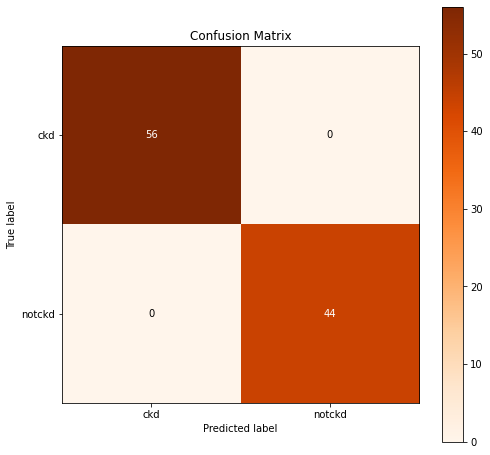

In [21]:
skplt.metrics.plot_confusion_matrix(y_test, Y_pred_lr, cmap = 'Oranges', figsize=(8,8))

In [22]:
jac_score_logreg = round(jaccard_score(y_test, Y_pred_lr, pos_label='ckd') * 100, 2)
print("Jaccard Score: ", jac_score_logreg)

Jaccard Score:  100.0


### K-Nearest Neighbour

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
print("K - Nearest Neighbours Accuracy: ", acc_knn)

K - Nearest Neighbours Accuracy:  100.0


In [24]:
class_report = classification_report(y_test, Y_pred_knn)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        56
      notckd       1.00      1.00      1.00        44

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

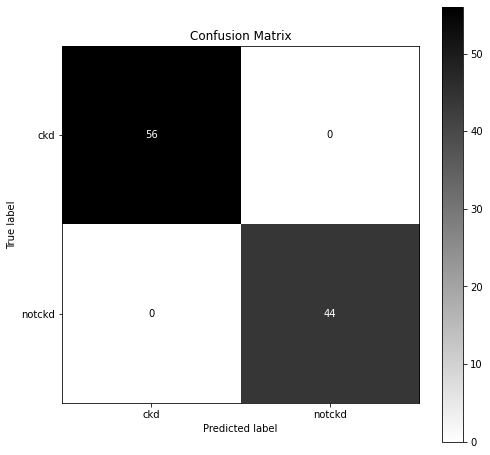

In [25]:
skplt.metrics.plot_confusion_matrix(y_test, Y_pred_knn, cmap = 'binary', figsize=(8,8))

In [26]:
jac_score_knn = round(jaccard_score(y_test, Y_pred_knn, pos_label='ckd') * 100, 2)
print("Jaccard Score: ", jac_score_knn)

Jaccard Score:  100.0


### Random Forest

In [27]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test,y_test) * 100, 2)
print("Random Forest Accuracy: ", acc_random_forest)

Random Forest Accuracy:  99.0


In [28]:
class_report = classification_report(y_test, Y_pred_rf)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        56
      notckd       0.98      1.00      0.99        44

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

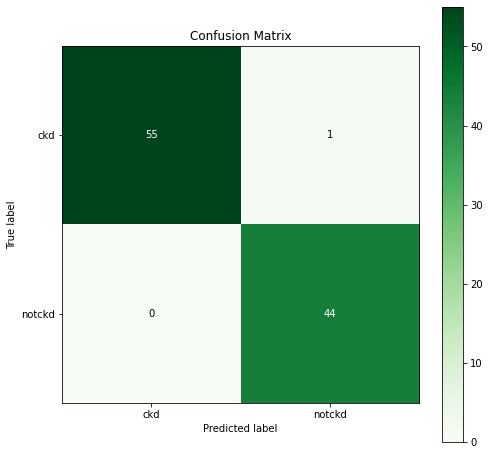

In [29]:
skplt.metrics.plot_confusion_matrix(y_test, Y_pred_rf, cmap = 'Greens', figsize=(8,8))

In [30]:
jac_score_rf = round(jaccard_score(y_test, Y_pred_rf, pos_label='ckd') * 100, 2)
print("Jaccard Score: ", jac_score_rf)

Jaccard Score:  98.21


### Gaussian Naive Bayes

In [31]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gnb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test,y_test) * 100, 2)
print("Gaussian Naive Bayes Accuracy: ", acc_gaussian)

Gaussian Naive Bayes Accuracy:  97.0


In [32]:
class_report = classification_report(y_test, Y_pred_gnb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

         ckd       1.00      0.95      0.97        56
      notckd       0.94      1.00      0.97        44

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

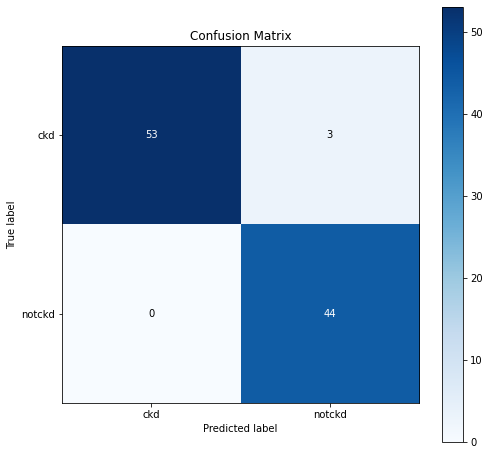

In [33]:
skplt.metrics.plot_confusion_matrix(y_test, Y_pred_gnb, cmap = 'Blues', figsize=(8,8))

In [34]:
jac_score_gaussian = round(jaccard_score(y_test, Y_pred_gnb, pos_label='ckd') * 100, 2)
print("Jaccard Score: ", jac_score_gaussian)

Jaccard Score:  94.64


### Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test,y_test) * 100, 2)
print("Decision Tree Accuracy: ", acc_decision_tree)

Decision Tree Accuracy:  98.0


In [36]:
class_report = classification_report(y_test, Y_pred_dt)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

         ckd       0.97      1.00      0.98        56
      notckd       1.00      0.95      0.98        44

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

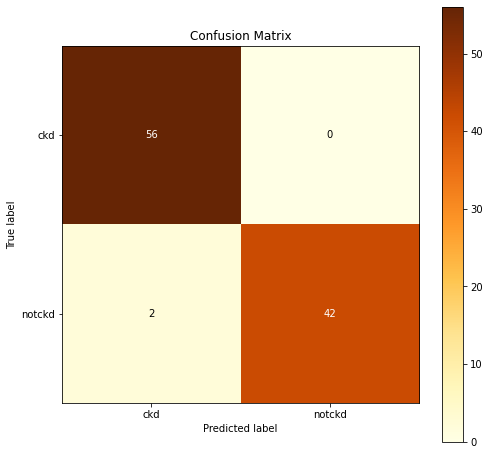

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, Y_pred_dt, cmap = 'YlOrBr', figsize=(8,8))

In [38]:
jac_score_dt = round(jaccard_score(y_test, Y_pred_dt, pos_label='ckd') * 100, 2)
print("Jaccard Score: ", jac_score_dt)

Jaccard Score:  96.55


### Finalize Result

In [39]:
models = pd.DataFrame({
    'Algorithm Name': ['Logistic Regression', 'KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Accuracy Score (%)': [acc_log, acc_knn, acc_random_forest, acc_gaussian, acc_decision_tree],
    'Jaccard Score (%)' : [jac_score_logreg, jac_score_knn, jac_score_rf, jac_score_gaussian, jac_score_dt],
    'Misclassification (%)': [(abs(acc_log-100)), (abs(acc_knn-100)), (abs(acc_random_forest-100)), (abs(acc_gaussian-100)), (abs(acc_decision_tree-100))]
})

models.sort_values(by = 'Accuracy Score (%)', ascending = False)

,Algorithm Name,Accuracy Score (%),Jaccard Score (%),Misclassification (%)
0,Logistic Regression,100.0,100.00,0.0
1,KNN,100.0,100.00,0.0
2,Random Forest,99.0,98.21,1.0
4,Decision Tree,98.0,96.55,2.0
3,Naive Bayes,97.0,94.64,3.0


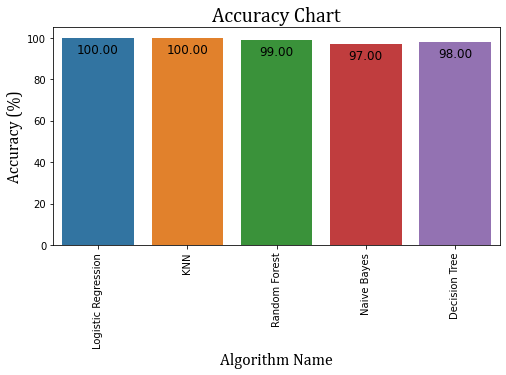

In [40]:
Tfont = {'fontname':'Cambria', 'fontsize':20}
Lfont = {'fontname':'Cambria', 'fontsize':16}

plt.figure(figsize=(8, 4))
splot=sns.barplot(y="Accuracy Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Accuracy Chart",**Tfont)
plt.ylabel("Accuracy (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()